
<img align="left" src = https://scienceserver.linea.org.br/images/linea-logo.png width=120 style="padding: 20px"> <br> 
<img align="left" src = https://jupyter.org/assets/homepage/hublogo.svg width=200 style="padding: 20px"> <br> 
<br>
<br>
<br>
<br>

 

Notebook original: Julia Gschwend

Adaptação: Heleno Campos e Marcela Vitti

***


Bem vindo(a) ao LIneA JupyterHub! 

O LIneA JupyterHub oferece acesso a dados públicos disponíveis online e a dados privados de levantamentos fotométricos cuja participação de cientistas brasileiros com _data rights_ é apoiada pelo LIneA. Neste notebook vamos exemplificar o acesso aos dados públicos do levantamento _Gaia_. Caso precise de ajuda, entre em contato pelo e-mail: [helpdesk@linea.org.br](mailto:helpdesk@linea.org.br)


## 1. Sobre os dados


<img align="left" src=https://gaia.aip.de/cms/data/img/eDR3_flux_hammer_1000x500_v1.png width=400 style="background-color:black; padding: 20px; margin-right: 2em"> <br>




O [Observatório Espacial Gaia](https://www.esa.int/Science_Exploration/Space_Science/Gaia) é uma missão da Agência Espacial Europeia (ESA) dedicada a mapear com precisão a posição, a distância e o movimento de mais de 1,8 bilhão de estrelas em toda a Via Láctea, com o objetivo de entender a estrutura e evolução da galáxia. Através de medições de astrometria, fotometria e espectroscopia, o Gaia registra dados em três bandas no espectro visível: G, BP (Blue Photometer) e RP (Red Photometer), permitindo uma caracterização detalhada de estrelas, além da detecção de milhares de novos asteroides, exoplanetas e outros objetos celestes.

O [Gaia Data Release 3 (DR3)](https://www.cosmos.esa.int/web/gaia/data-release-3), disponibilizado ao público em 2022, é o conjunto de dados mais extenso e detalhado da missão até o momento. O DR3 fornece informações astrométricas e fotométricas aprimoradas, além de incluir novos produtos, como composições químicas, temperaturas estelares, velocidades radiais e detecções de variação temporal para cerca de 1,8 bilhão de fontes observadas. Os dados cobrem todo o céu e são acessíveis através de diversos portais, incluindo o Gaia Archive e serviços compatíveis com o protocolo TAP, como o Gaia DR3 TAP+ para acesso via consultas SQL. Ele também pode ser acessado aqui pelo JupyterHub, como veremos a seguir.

## 2. Acesso ao banco de dados 

Dentro da plataforma LIneA JupyterHub, o acesso ao banco de dados é feito através da biblioteca [`dblinea`](https://github.com/linea-it/dblinea), que já está disponível no ambiente. Confira a documentação completa da biblioteca `dblinea` [neste link](https://dblinea.readthedocs.io/en/latest/index.html).


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from astropy import units as u
from astropy.coordinates import SkyCoord

from dblinea import DBBase

%reload_ext autoreload
%autoreload 2

**Leitura dos dados**


A classe `DBBase` faz a conexão com o banco de dados e oferece algumas funcionalidades como veremos a seguir. Nos exemplos abaixo, vamos acessar os dados da tabela **source** do catálogo **gaia_dr3**. 

In [2]:
db = DBBase()
schema = "gaia_dr3"
tablename = "source"

Para obter a lista de colunas disponíveis: 

In [3]:
db.get_table_columns(tablename, schema=schema)

['solution_id',
 'designation',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astrometric_matched_transits',
 'visibility_periods_used',
 'astrometric_sigma5d_max

Para saber o tipo de dado em cada coluna: 

In [4]:
db.describe_table(tablename, schema=schema)

[{'name': 'solution_id', 'type': BIGINT()},
 {'name': 'designation', 'type': VARCHAR(length=255)},
 {'name': 'source_id', 'type': BIGINT()},
 {'name': 'random_index', 'type': BIGINT()},
 {'name': 'ref_epoch', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'ra', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'ra_error', 'type': REAL()},
 {'name': 'dec', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'dec_error', 'type': REAL()},
 {'name': 'parallax', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'parallax_error', 'type': REAL()},
 {'name': 'parallax_over_error', 'type': REAL()},
 {'name': 'pm', 'type': REAL()},
 {'name': 'pmra', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'pmra_error', 'type': REAL()},
 {'name': 'pmdec', 'type': DOUBLE_PRECISION(precision=53)},
 {'name': 'pmdec_error', 'type': REAL()},
 {'name': 'ra_dec_corr', 'type': REAL()},
 {'name': 'ra_parallax_corr', 'type': REAL()},
 {'name': 'ra_pmra_corr', 'type': REAL()},
 {'name': 'ra_pmdec_corr', 'typ

A função `fetchall(query)` faz a consulta no banco de dados e retorna uma lista de tuplas com os dados referentes à _query_ fornecida no argumento. Por exemplo, vamos consultar o identificador único e as coordenadas dos objetos nas 10 primeiras linhas da tabela.  

In [5]:
query = "SELECT source_id, ra, dec FROM gaia_dr3.source limit 10"
lista_10_objetos = db.fetchall(query)
lista_10_objetos

[(1936522624021260928, 346.89841161392627, 47.62175792809793),
 (1936522555298847872, 346.916033363793, 47.61999884630976),
 (1936522551002075648, 346.9151331662208, 47.62042466684144),
 (1936521833745675904, 346.9310248122771, 47.612632208576066),
 (1936521833747417088, 346.928885105536, 47.61371193479549),
 (1936521829447552384, 346.93352503019224, 47.613118608897786),
 (1936522555299442688, 346.92133454572405, 47.614142723405735),
 (1936521829447554816, 346.93774981259355, 47.61404123870553),
 (1936521868105925504, 346.94929700046646, 47.61265724507877),
 (1936521833744345728, 346.9356932591911, 47.61827664407877)]

A função `fetchall_dict(query)` faz a consulta no banco de dados e retorna uma lista de dicionários com os dados referentes à _query_ fornecida no argumento. Vamos repetir a consulta do exemplo anterior, ou seja, vamos utilizar o mesmo _SQL statement_ atribuído à variável `query`.    

In [6]:
dict_10_objetos = db.fetchall_dict(query)
dict_10_objetos

[{'source_id': 1936522624021260928,
  'ra': 346.89841161392627,
  'dec': 47.62175792809793},
 {'source_id': 1936522555298847872,
  'ra': 346.916033363793,
  'dec': 47.61999884630976},
 {'source_id': 1936522551002075648,
  'ra': 346.9151331662208,
  'dec': 47.62042466684144},
 {'source_id': 1936521833745675904,
  'ra': 346.9310248122771,
  'dec': 47.612632208576066},
 {'source_id': 1936521833747417088,
  'ra': 346.928885105536,
  'dec': 47.61371193479549},
 {'source_id': 1936521829447552384,
  'ra': 346.93352503019224,
  'dec': 47.613118608897786},
 {'source_id': 1936522555299442688,
  'ra': 346.92133454572405,
  'dec': 47.614142723405735},
 {'source_id': 1936521829447554816,
  'ra': 346.93774981259355,
  'dec': 47.61404123870553},
 {'source_id': 1936521868105925504,
  'ra': 346.94929700046646,
  'dec': 47.61265724507877},
 {'source_id': 1936521833744345728,
  'ra': 346.9356932591911,
  'dec': 47.61827664407877}]

A função `fetchall_df(query)` faz a consulta no banco de dados e retorna um objeto do tipo [pandas.DataFrame](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) com os dados referentes à _query_ fornecida no argumento. Vamos repetir a consulta dos exemplo anteriores:

In [7]:
dataframe_10_objetos = db.fetchall_df(query)
dataframe_10_objetos

,source_id,ra,dec
0,1936522624021260928,346.898412,47.621758
1,1936522555298847872,346.916033,47.619999
2,1936522551002075648,346.915133,47.620425
3,1936521833745675904,346.931025,47.612632
4,1936521833747417088,346.928885,47.613712
5,1936521829447552384,346.933525,47.613119
6,1936522555299442688,346.921335,47.614143
7,1936521829447554816,346.937750,47.614041
8,1936521868105925504,346.949297,47.612657
9,1936521833744345728,346.935693,47.618277


### Exemplos 

Para ilustrar a visualização de uma pequena amostra de dados, vamos construir o diagrama cor-magnitude com as estrelas da [galáxia anã de Sculptor](https://en.wikipedia.org/wiki/Sculptor_Dwarf_Galaxy). 

|Coordenadas Equatoriais| |
|:-- |--- | 
|Ascensão Reta| 01h 00m 09.3s |
|Declinação| −33° 42' 33" |


A tabela abaixo traz os significados das colunas que vamos utilizar para fazer a consulta no banco de dados. A lista completa de colunas disponíveis na tabela **source** do **gaia_dr3** está disponível [nesta página](https://userquery.linea.org.br/metadata/gaia_dr3/source/). 


|Coluna | Significado |
|---|---|
|source_id | Unique source identifier (unique within a particular Data Release)|
|ra | Right ascension [degrees]|
|dec | Declination [degrees] |
|phot_g_mean_mag | G-band mean magnitude |
|phot_bp_mean_mag| Integrated BP mean magnitude |
|phot_rp_mean_mag | Integrated RP mean magnitude |

Para fazer uma busca pelas coordenadas no banco, precisamos converter as unidades para graus. Para isto, vamos usar a classe `SkyCoord` do módulo `astropy.coordinates` (veja detalhes na [documentação do Astropy](https://docs.astropy.org/en/stable/api/astropy.coordinates.SkyCoord.html)):

In [8]:
c = SkyCoord('01h00m09.3s', '−33d42m33s', frame='icrs')
c  

<SkyCoord (ICRS): (ra, dec) in deg
    (15.03875, -33.70916667)>

In [9]:
print(f"R.A.: {c.ra.deg:.1f} degrees")
print(f"Dec.: {c.dec.deg:.1f} degrees")

R.A.: 15.0 degrees
Dec.: -33.7 degrees


Os dois exemplos abaixos mostram a consulta das magnitudes nas bandas _g, BP, RP_.

#### **Exemplo 1: seleção de uma região "retangular"**

Para selecionar qualquer amostra com base nas coordenadas de posição, recomenda-se utilizar as funções da biblioteca [Q3C](https://github.com/segasai/q3c) ([Koposov, S., & Bartunov, O. 2006](http://adsabs.harvard.edu/abs/2006ASPC..351..735K)) para tirar vantagem da indexação das colunas. Uma busca por uma região no céu definida por faixas de coordenadas resultaria em uma varredura em todos os ~700 milhões de objetos, o que pode levar um tempo considerável!   


Para consultar objetos dentro de uma região contida em um polígono, basta informar os vértices do polígono pra a função `q3c_poly_query()`. A documentação das funções está disponível no [repositório do Q3C](https://github.com/segasai/q3c).  

Vamos selecionar as magnitudes de uma amostra de estrelas em uma região "quadrada" (na esfera celeste) de lado igual a 1 grau, ou seja, com uma margem de 0.5 graus em torno da posição do nosso alvo. 

**Vértices (ra, dec)**: (14.5, -34.2), (15.5, -34.2), (15.5, -33.2), (14.5, -33.2)

A query ficaria assim (o uso de letras maiúsculas é opcional):  

```sql 
SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag 
FROM gaia_dr3.source 
WHERE q3c_poly_query(ra, dec, ARRAY[14.5, -34.2, 15.5, -34.2, 15.5, -33.2, 14.5, -33.2])
````

In [10]:
query_1 = """
    SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag 
    FROM gaia_dr3.source
    WHERE q3c_poly_query(ra, dec, ARRAY[14.5, -34.2, 15.5, -34.2, 15.5, -33.2, 14.5, -33.2])
"""        
query_1 

'\n    SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag \n    FROM gaia_dr3.source\n    WHERE q3c_poly_query(ra, dec, ARRAY[14.5, -34.2, 15.5, -34.2, 15.5, -33.2, 14.5, -33.2])\n'

In [11]:
%%time
dados_exemplo_1 = db.fetchall_df(query_1)

CPU times: user 46.6 ms, sys: 13.9 ms, total: 60.5 ms
Wall time: 104 ms


In [12]:
dados_exemplo_1

,source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,5003135217595921280,14.896175,-34.200944,20.670479,21.485030,19.491549
1,5003136622049488128,14.919512,-34.197475,20.323282,20.591263,19.946445
2,5003136523267088000,14.976400,-34.192132,15.799913,16.236801,15.201299
3,5003133564032774784,14.981179,-34.195074,20.806082,19.995558,18.525887
4,5003133564032776192,14.983329,-34.188044,18.334703,18.585596,17.932098
...,...,...,...,...,...,...
10283,5027267225787368192,15.349685,-33.218633,18.996025,20.032774,17.996616
10284,5027268737615860736,15.367198,-33.202485,17.550467,18.783382,16.456028
10285,5027256922162336768,15.487770,-33.220245,20.926369,21.025276,20.326284
10286,5027257020945076352,15.492717,-33.206615,19.899817,20.337255,19.332148


#### **Exemplo 2: seleção de uma região  circular com Q3C**  

Para selecionar uma região circular, basta informar as coordenadas do centro da seleção e um raio (em graus) nos argumentos da função `q3c_radial_query()`. Para um diâmetro de 1 grau, a query ficaria assim:
    
```sql
    SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag 
    FROM gaia_dr3.source
    WHERE q3c_radial_query(ra, dec, 15.0, -33.7, 0.5)
````

In [13]:
query_2 = """
    SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag 
    FROM gaia_dr3.source
    WHERE q3c_radial_query(ra, dec, 15.0, -33.7, 0.5)
"""
query_2    

'\n    SELECT source_id, ra, dec, phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag \n    FROM gaia_dr3.source\n    WHERE q3c_radial_query(ra, dec, 15.0, -33.7, 0.5)\n'

In [14]:
%%time
dados_exemplo_2 = db.fetchall_df(query_2)

CPU times: user 63.3 ms, sys: 3.49 ms, total: 66.8 ms
Wall time: 107 ms


In [15]:
dados_exemplo_2

,source_id,ra,dec,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
0,5003136523267088000,14.976400,-34.192132,15.799913,16.236801,15.201299
1,5003133564032774784,14.981179,-34.195074,20.806082,19.995558,18.525887
2,5003133564032776192,14.983329,-34.188044,18.334703,18.585596,17.932098
3,5003136523267087872,14.980368,-34.187757,17.015768,17.279398,16.594845
4,5003136523266103168,14.981597,-34.185426,21.145567,21.839266,20.145790
...,...,...,...,...,...,...
10218,5027247434578067200,15.165005,-33.219659,20.850773,19.401575,17.736645
10219,5027244174699037440,15.196459,-33.255762,20.559156,20.698648,20.059267
10220,5027247163996322560,15.191932,-33.248815,20.473150,20.557066,20.336630
10221,5027247163996378752,15.201308,-33.242304,21.140854,21.576174,20.093851


### Gráficos 

A seguir, veremos exemplos de gráficos estáticos básicos com a biblioteca Matplotlib. 

Documentação da biblioteca: [matplotlib.org](https://matplotlib.org/)

Dicas: [Cheatsheets for Matplotlib users](https://github.com/matplotlib/cheatsheets#cheatsheets)

#### Distribuição espacial

CPU times: user 192 ms, sys: 233 ms, total: 426 ms
Wall time: 211 ms


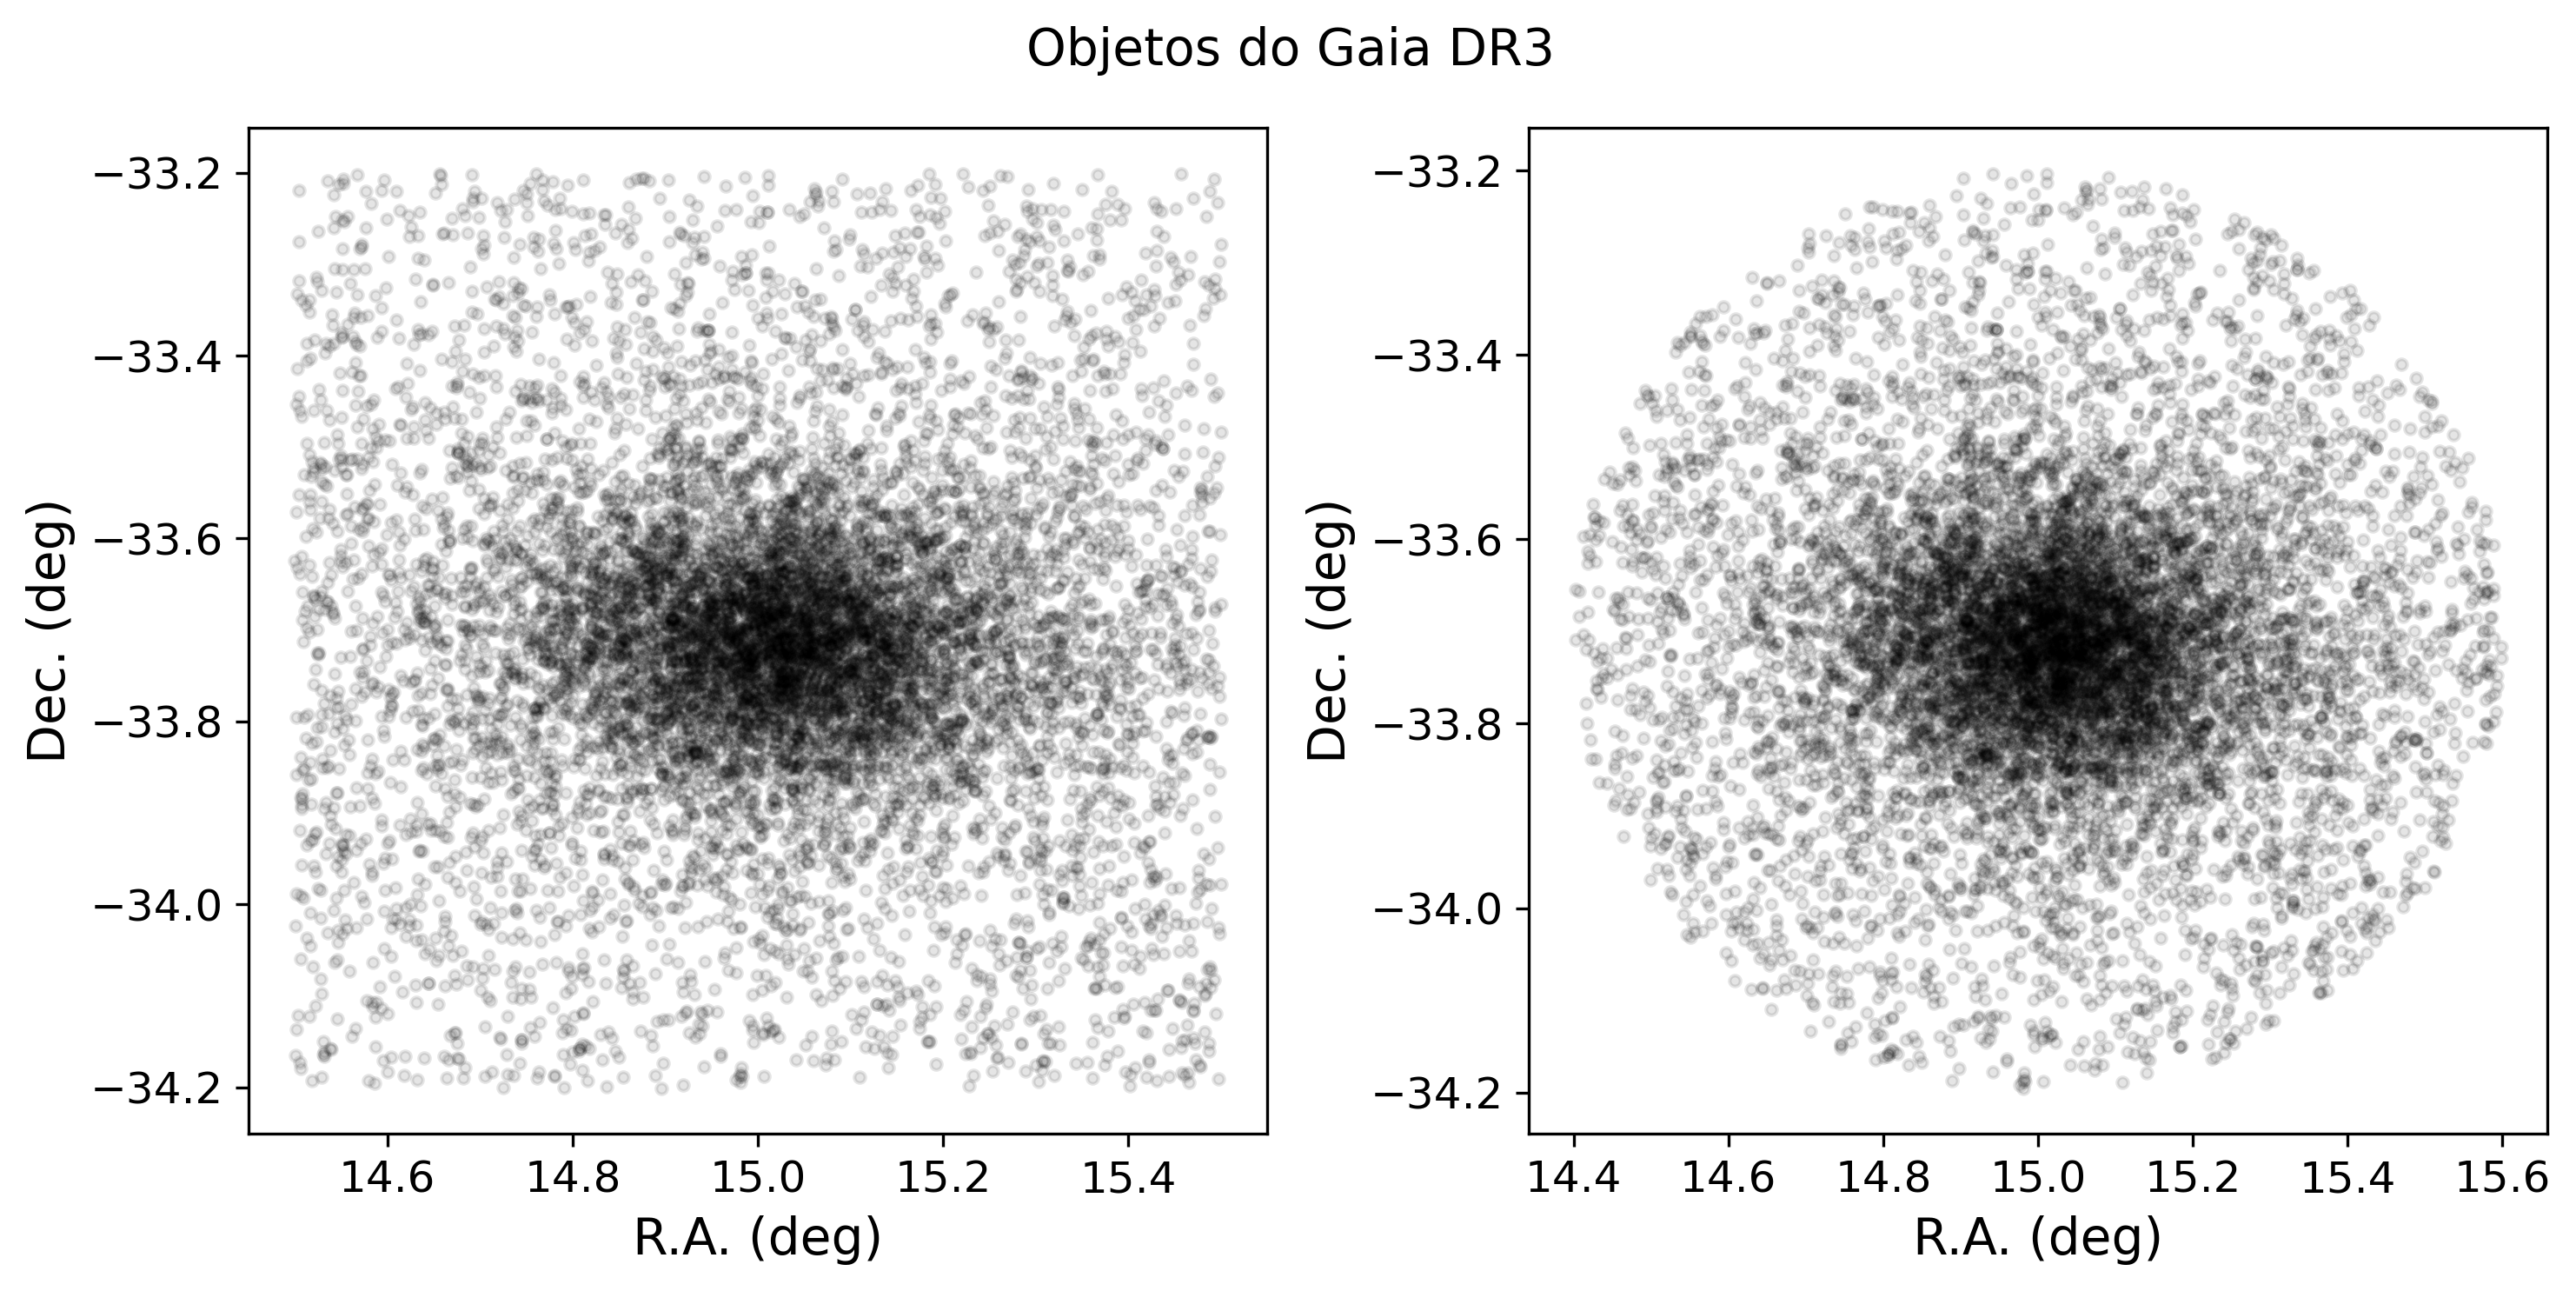

In [16]:
%%time
plt.figure(figsize=[10,5], dpi=300)
plt.suptitle("Objetos do Gaia DR3", fontsize=14)
plt.subplot(1,2,1)
plt.plot(dados_exemplo_1.ra, dados_exemplo_1.dec, 'k.', alpha=0.1)
plt.xlabel("R.A. (deg)", fontsize=14)
plt.ylabel("Dec. (deg)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1,2,2)
plt.plot(dados_exemplo_2.ra, dados_exemplo_2.dec, 'k.', alpha=0.1)
plt.xlabel("R.A. (deg)", fontsize=14)
plt.ylabel("Dec. (deg)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

#### Mapa de densidade

CPU times: user 277 ms, sys: 256 ms, total: 533 ms
Wall time: 252 ms


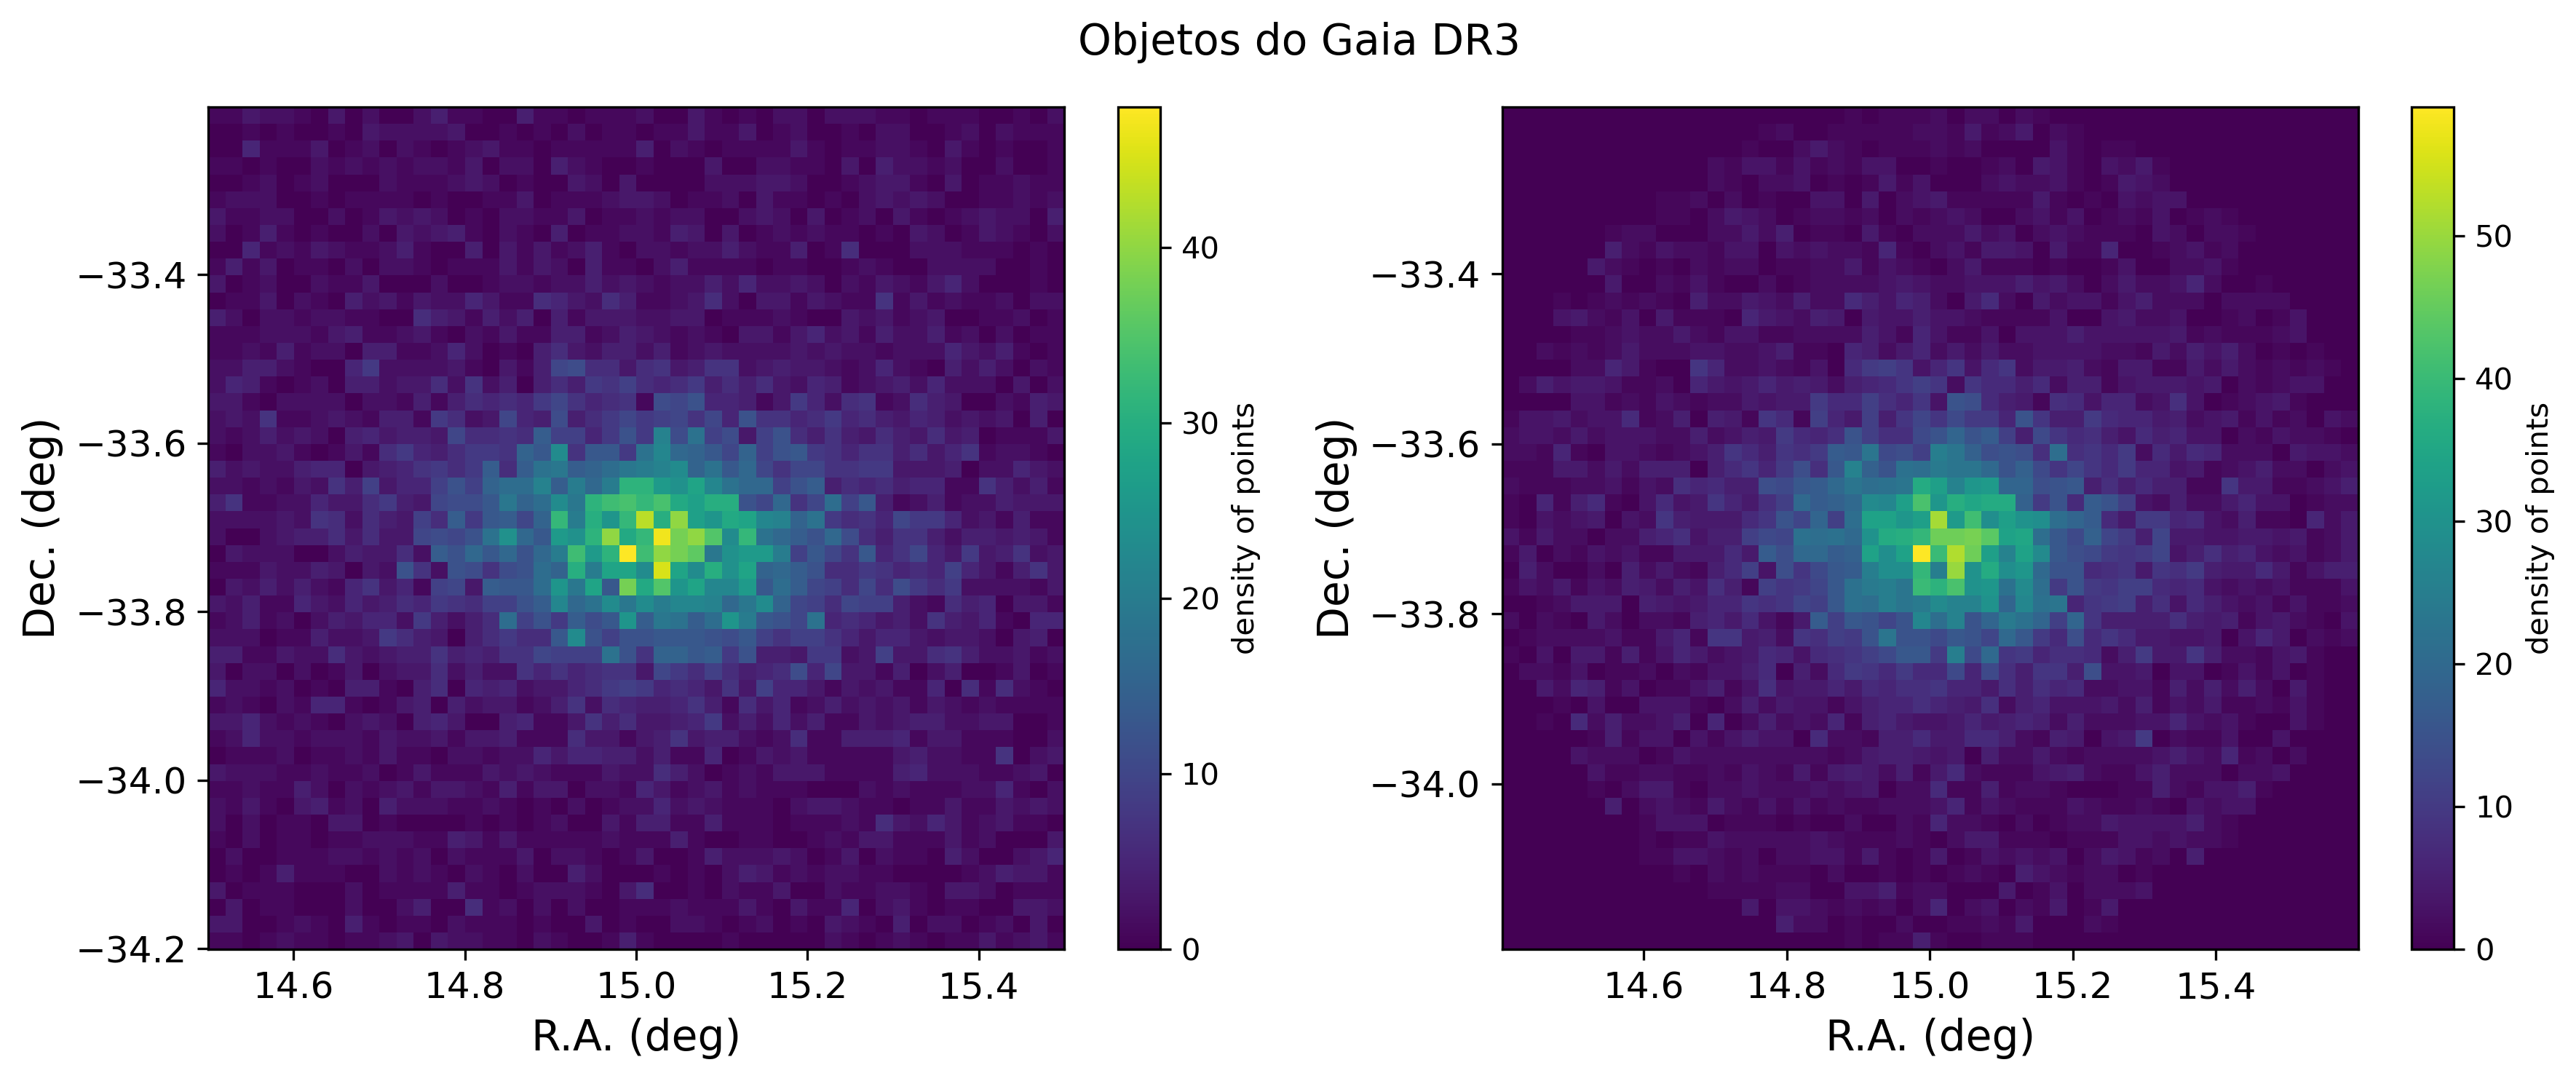

In [17]:
%%time
plt.figure(figsize=[12,5], dpi=300)
plt.suptitle("Objetos do Gaia DR3", fontsize=14)
plt.subplot(1,2,1)
plt.hist2d(dados_exemplo_1.ra, dados_exemplo_1.dec, bins=50)
plt.xlabel("R.A. (deg)", fontsize=14)
plt.ylabel("Dec. (deg)", fontsize=14)
plt.colorbar(label="density of points")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.subplot(1,2,2)
plt.hist2d(dados_exemplo_2.ra, dados_exemplo_2.dec, bins=50)
plt.xlabel("R.A. (deg)", fontsize=14)
plt.ylabel("Dec. (deg)", fontsize=14)
plt.colorbar(label="density of points")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

*** 

Para o gráfico do CMD, vamos utilizar apenas o exemplo 2. 

In [18]:
dados = dados_exemplo_2
del dados_exemplo_1   # limpando da memória os dataframes
del dados_exemplo_2   # que não vamos mais utilizar 

Por conveniência, podemos alterar os nomes de algumas colunas. 

In [19]:
new_columns = {"source_id": "object_id",
               "phot_g_mean_mag": "mag_g",
               "phot_bp_mean_mag": "mag_bp",
               "phot_rp_mean_mag": "mag_rp",
              }

dados.rename(columns=new_columns, inplace=True)

In [20]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10223 entries, 0 to 10222
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   object_id  10223 non-null  int64  
 1   ra         10223 non-null  float64
 2   dec        10223 non-null  float64
 3   mag_g      10218 non-null  float64
 4   mag_bp     10093 non-null  float64
 5   mag_rp     10101 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 479.3 KB


In [21]:
dados.head()

,object_id,ra,dec,mag_g,mag_bp,mag_rp
0,5003136523267088000,14.976400,-34.192132,15.799913,16.236801,15.201299
1,5003133564032774784,14.981179,-34.195074,20.806082,19.995558,18.525887
2,5003133564032776192,14.983329,-34.188044,18.334703,18.585596,17.932098
3,5003136523267087872,14.980368,-34.187757,17.015768,17.279398,16.594845
4,5003136523266103168,14.981597,-34.185426,21.145567,21.839266,20.145790


Cálculo da cor _g-r_ (nova coluna no _dataframe_ **dados**). 

In [22]:
dados["bp_rp"] = dados.mag_bp - dados.mag_rp

In [23]:
dados.head()

,object_id,ra,dec,mag_g,mag_bp,mag_rp,bp_rp
0,5003136523267088000,14.976400,-34.192132,15.799913,16.236801,15.201299,1.035502
1,5003133564032774784,14.981179,-34.195074,20.806082,19.995558,18.525887,1.469671
2,5003133564032776192,14.983329,-34.188044,18.334703,18.585596,17.932098,0.653498
3,5003136523267087872,14.980368,-34.187757,17.015768,17.279398,16.594845,0.684553
4,5003136523266103168,14.981597,-34.185426,21.145567,21.839266,20.145790,1.693476


In [24]:
dados.count()

object_id    10223
ra           10223
dec          10223
mag_g        10218
mag_bp       10093
mag_rp       10101
bp_rp        10086
dtype: int64

In [25]:
dados = dados.dropna()
dados.count()

object_id    10086
ra           10086
dec          10086
mag_g        10086
mag_bp       10086
mag_rp       10086
bp_rp        10086
dtype: int64

In [26]:
dados.describe()

,object_id,ra,dec,mag_g,mag_bp,mag_rp,bp_rp
count,1.008600e+04,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000,10086.000000
mean,5.017609e+18,15.016069,-33.710193,19.819892,20.153614,19.160056,0.993558
std,1.176116e+16,0.223397,0.163114,1.324267,1.222798,1.386471,0.542067
min,5.003127e+18,14.402221,-34.195074,7.187225,7.928091,6.350117,-2.240430
25%,5.003210e+18,14.884751,-33.798868,19.432403,19.861161,18.602077,0.716210
50%,5.027174e+18,15.020678,-33.712123,20.121146,20.376717,19.588490,0.971268
75%,5.027220e+18,15.151328,-33.624513,20.658202,20.920190,20.091501,1.176471
max,5.027436e+18,15.598818,-33.203346,22.272585,23.618052,22.585436,4.879089


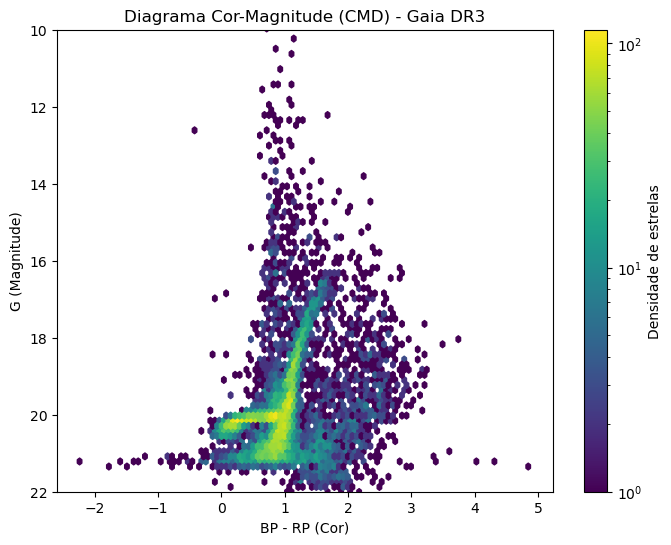

In [27]:
plt.figure(figsize=(8, 6))
plt.hexbin(dados.bp_rp, dados.mag_g, gridsize=100, bins='log')
plt.gca().invert_yaxis()  # Inverte o eixo y, pois magnitudes maiores são mais fracas
plt.xlabel('BP - RP (Cor)')
plt.ylabel('G (Magnitude)')
plt.title('Diagrama Cor-Magnitude (CMD) - Gaia DR3')
# plt.xlim(-0.5,1.5)
plt.ylim(22,10)
plt.colorbar(label='Densidade de estrelas')
plt.show()